<a href="https://colab.research.google.com/github/Aksharas1997/internship/blob/main/internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SALARY PREDICTION

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import plot_confusion_matrix

LOADING DATASET

In [72]:
from google.colab import files
uploaded=files.upload()

Saving HRDataset_v14.csv to HRDataset_v14 (2).csv


In [73]:
data=pd.read_csv('HRDataset_v14.csv')
data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [75]:
data.shape

(311, 36)

In [76]:
data.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [77]:
data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [78]:
data.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

PREPROCESSING

1.Handling missing values

In [79]:
data.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [80]:
#Assigning present date to the missing values as those people were still working
data ['DateofTermination'] = data['DateofTermination'].fillna('01/03/2022')
data['ManagerID']=data['ManagerID'].fillna(method='ffill')
data.isnull().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

In [81]:
#converting datatype of dates to datetime
data['DOB']=pd.to_datetime(data['DOB'])
data['DateofHire']=pd.to_datetime(data['DateofHire'])
data['DateofTermination']=pd.to_datetime(data['DateofTermination'])
data['LastPerformanceReview_Date']=pd.to_datetime(data['LastPerformanceReview_Date'])
data.dtypes

Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                           datetime64[ns]
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTerm

Adding new columns for Experience and Age

In [82]:
from datetime import timedelta
data['Experience in Years']=data['DateofTermination']-data['DateofHire']
data['Experience in Years']=data['Experience in Years']/timedelta(days=365)
data['Experience in Years']=data['Experience in Years'].astype(float).astype(int)
data['Experience in Years']

0      10
1       1
2       1
3      14
4       5
       ..
306     7
307     7
308    11
309     6
310     7
Name: Experience in Years, Length: 311, dtype: int64

In [83]:
import datetime as dt
data['now']=dt.datetime.now()
data['Age'] = (pd.to_datetime(data['now']) - (data['DOB'])).dt.days
data['Age']=data['Age']/365
data['Age']

0      38.745205
1      46.931507
2      33.545205
3      33.523288
4      32.575342
         ...    
306    36.906849
307    39.928767
308    42.608219
309    43.120548
310    43.643836
Name: Age, Length: 311, dtype: float64

In [84]:
data['Age'] = data['Age'].astype(float).astype(int)
data['Age']

0      38
1      46
2      33
3      33
4      32
       ..
306    36
307    39
308    42
309    43
310    43
Name: Age, Length: 311, dtype: int64

In [85]:
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Experience in Years,now,Age
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Exceeds,4.60,5,0,2019-01-17,0,1,10,2022-03-29 17:18:52.216256,38
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Fully Meets,4.96,3,6,2016-02-24,0,17,1,2022-03-29 17:18:52.216256,46
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Fully Meets,3.02,3,0,2012-05-15,0,3,1,2022-03-29 17:18:52.216256,33
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Fully Meets,4.84,5,0,2019-01-03,0,15,14,2022-03-29 17:18:52.216256,33
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Fully Meets,5.00,4,0,2016-02-01,0,2,5,2022-03-29 17:18:52.216256,32


In [86]:
data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences', 'Experience in Years', 'now', 'Age'],
      dtype='object')

DATA VISUALIZATIONS

a)Count of male and female employees in the company

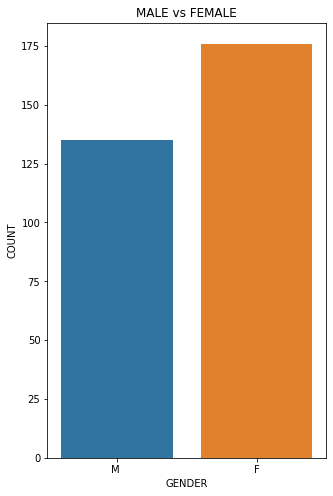

In [87]:
plt.figure(figsize=(5,8))
sns.countplot(x='Sex',data=data);
plt.xlabel("GENDER")
plt.ylabel("COUNT")
plt.title("MALE vs FEMALE")
plt.show()

b)Performance score of the candidates

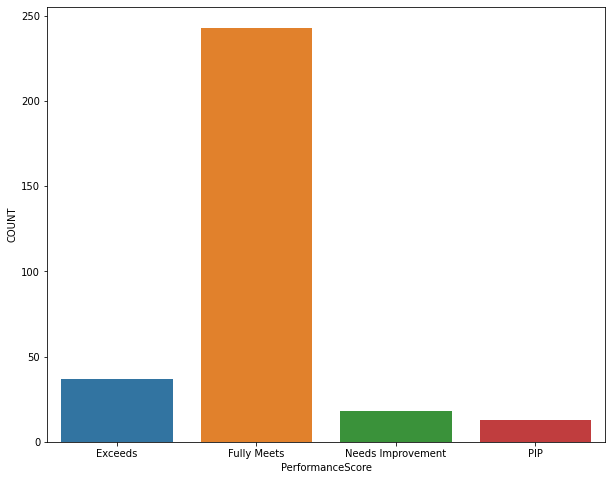

In [88]:
plt.figure(figsize=(10,8))
sns.countplot(x='PerformanceScore',data=data);
plt.xlabel("PerformanceScore")
plt.ylabel("COUNT")
plt.show()

Removing unwanted columns

In [89]:
data.drop(['Employee_Name','EmpID','MarriedID','MaritalStatusID','GenderID','PositionID','State','Zip','DOB',
       'Sex','FromDiversityJobFairID','MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName','RecruitmentSource', 'LastPerformanceReview_Date','now'],axis=1,inplace=True)


Required dataset as specified in the dataset

In [90]:
data.head()

,EmpStatusID,DeptID,PerfScoreID,Salary,Termd,Position,ManagerID,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Experience in Years,Age
0,1,5,4,62506,0,Production Technician I,22.0,Exceeds,4.60,5,0,0,1,10,38
1,5,3,3,104437,1,Sr. DBA,4.0,Fully Meets,4.96,3,6,0,17,1,46
2,5,5,3,64955,1,Production Technician II,20.0,Fully Meets,3.02,3,0,0,3,1,33
3,1,5,3,64991,0,Production Technician I,16.0,Fully Meets,4.84,5,0,0,15,14,33
4,5,5,3,50825,1,Production Technician I,39.0,Fully Meets,5.00,4,0,0,2,5,32


ENCODING

In [91]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Position'] = label_encoder.fit_transform(data['Position'])
data['PerformanceScore'] = label_encoder.fit_transform(data['PerformanceScore'])

Splitting dataset in to target and features

In [92]:
y=data['Salary']               
x=data.drop(['Salary'],axis=1)


In [93]:
#Standard Scaling
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()  
x=standardisation.fit_transform(x)
x=pd.DataFrame(x)

In [94]:
x=preprocessing.normalize(x)
x=pd.DataFrame(x)

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

MODELS TO PREDICT SALARY

1.Linear regression

In [96]:
from sklearn.linear_model import LinearRegression       
regressor=LinearRegression()   
regressor.fit(x_train,y_train)
predictions=regressor.predict(x_test)
predictions

array([ 78439.6593976 , 100981.45689078,  87997.74981104,  51023.61268611,
        87472.41590096,  51298.66222691,  75679.34017032,  56674.67390972,
        91186.05728088,  58062.971718  , 101053.50714698,  59952.73139218,
        64405.79576468,  96632.3343833 ,  58276.5081958 ,  63656.06817211,
        74994.42650105,  70911.09554761,  94250.15923345,  54398.32160716,
        60288.53898993,  61753.67582338,  64097.84859187,  56688.75538857,
        91079.40708244,  60219.17975999, 100225.4358724 ,  60782.51315176,
        53435.58349854,  71533.93922884,  89668.03123643,  69394.49127361,
        50259.84991367,  64177.18360666,  71907.63028749,  58615.82139741,
        66406.03568984,  71383.77378011,  91744.98006814,  66487.6420609 ,
        97006.69175637,  63998.40749368,  61205.85793952,  56671.14844653,
        90314.50413584,  55320.885077  ,  67154.00937093,  67950.22502905,
        62123.6190547 ,  67885.4612683 ,  72333.71564957,  89296.01628609,
        66050.56305506,  

In [97]:
y_test

290     88976
9       50178
57      83552
60      65729
25     103613
        ...  
30      65288
22      62910
267     58273
56      63381
148     50482
Name: Salary, Length: 78, dtype: int64

In [98]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print ('R-SQUARE value is',r2_score(y_test,predictions))
print('MSE=',mean_squared_error(y_test,predictions))

R-SQUARE value is 0.36683082477280105
MSE= 438957806.52224714


2.SVM

In [99]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train) 
prediction_lsvm=svm_linear.predict(x_test)
print ('R-SQUARE value is',r2_score(y_test,prediction_lsvm))
print('MSE=',mean_squared_error(y_test,prediction_lsvm))

R-SQUARE value is 0.22436193713797903
MSE= 537727350.051282


3.DECISION TREE

In [100]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print ('R-SQUARE value is',r2_score(y_test,y_pred_dt))
print('MSE=',mean_squared_error(y_test,y_pred_dt))

R-SQUARE value is 0.7089463247744652
MSE= 201779062.93589744


RANDOM FOREST

In [101]:
from sklearn.ensemble import RandomForestRegressor         
rf=RandomForestRegressor()  
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print ('R-SQUARE value is',r2_score(y_test,y_pred_rf))
print('MSE=',mean_squared_error(y_test,y_pred_rf))

R-SQUARE value is 0.512344703425949
MSE= 338077259.12476796


ADABOOST

In [102]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(random_state=265)
ada.fit(x_train,y_train)
y_pred_ada = ada.predict(x_test)
print ('R-SQUARE value is',r2_score(y_test,y_pred_ada))
print('MSE=',mean_squared_error(y_test,y_pred_ada))

R-SQUARE value is 0.45311234567611736
MSE= 379141333.07258356


GRADIENT BOOST

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(random_state=265)
grad.fit(x_train,y_train)
y_pred_grad = grad.predict(x_test)
print ('R-SQUARE value is',r2_score(y_test,y_pred_grad))
print('MSE=',mean_squared_error(y_test,y_pred_grad))

R-SQUARE value is -0.17322412347702376
MSE= 813362222.8461539


DECISION TREE Regression algorithm is the best algorithm for this dataset based on the R-SQUARE value.So this model can be taken for salary prediction